# Análisis de conglomerados


#### Análisis jerárquico
#### Autor:
#### Fecha:

**Objetivo**

1. Identificar grupos de clientes con altos ingresos y bajos gastos
2. Clientes jóvenes con alta morosidad
3. Clientes mayores con altos ingresos y pocos gastos


**Dataset**

- IDCliente: Identificador único del cliente.
- Income: Ingresos mensuales del cliente en dólares.
- Expense: Gastos mensuales del cliente en dólares.
- Age: Edad del cliente.
- Products: Número de productos financieros que el cliente tiene contratados con el banco (cuentas de ahorro, tarjetas de crédito, préstamos, etc.).
- Delay: Indicador binario (0 o 1) que representa si el cliente ha tenido pagos atrasados en los últimos 12 meses (1 = sí, 0 = no).




# Cargar librerias

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Leer el archivo

In [77]:
data = pd.read_csv("customers_financial_data.csv")

In [78]:
data

,IDCliente,Income,Expense,Age,Products,Delay
0,1,8270,7568,67,2,0
1,2,1860,4650,31,8,0
2,3,6390,5395,19,4,0
3,4,6191,5373,26,8,0
4,5,6734,1981,54,7,1
...,...,...,...,...,...,...
995,996,6232,2425,67,4,0
996,997,6797,1119,50,8,1
997,998,5926,1774,44,9,0
998,999,7016,1456,24,3,0


# Mostrar el encabezado de los datos - head()


In [79]:
data.head(3)

,IDCliente,Income,Expense,Age,Products,Delay
0,1,8270,7568,67,2,0
1,2,1860,4650,31,8,0
2,3,6390,5395,19,4,0


# Mostrar los últimos registros de los datos - tail()


In [80]:
data.tail(3)

,IDCliente,Income,Expense,Age,Products,Delay
997,998,5926,1774,44,9,0
998,999,7016,1456,24,3,0
999,1000,4335,2439,23,7,1


# Mostrar el tamaño del dataset -  shape


In [81]:
data.shape

(1000, 6)

# Mostrar la información de cada variable - info()


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   IDCliente  1000 non-null   int64
 1   Income     1000 non-null   int64
 2   Expense    1000 non-null   int64
 3   Age        1000 non-null   int64
 4   Products   1000 non-null   int64
 5   Delay      1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


# Mostrar la información estadística de cada variable - describe()


In [83]:
data.describe()

,IDCliente,Income,Expense,Age,Products,Delay
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5594.25600,4162.399000,43.253000,4.999000,0.309000
std,288.819436,2533.55383,2171.169283,14.946518,2.596101,0.462312
min,1.000000,1004.00000,501.000000,18.000000,1.000000,0.000000
25%,250.750000,3467.50000,2296.750000,31.000000,3.000000,0.000000
50%,500.500000,5750.00000,4116.500000,43.000000,5.000000,0.000000
75%,750.250000,7806.75000,5937.500000,56.000000,7.000000,1.000000
max,1000.000000,9996.00000,7991.000000,69.000000,9.000000,1.000000


# Graficar la distribución de cada variable

In [84]:
columns_names = list(data.columns)
columns_names

['IDCliente', 'Income', 'Expense', 'Age', 'Products', 'Delay']

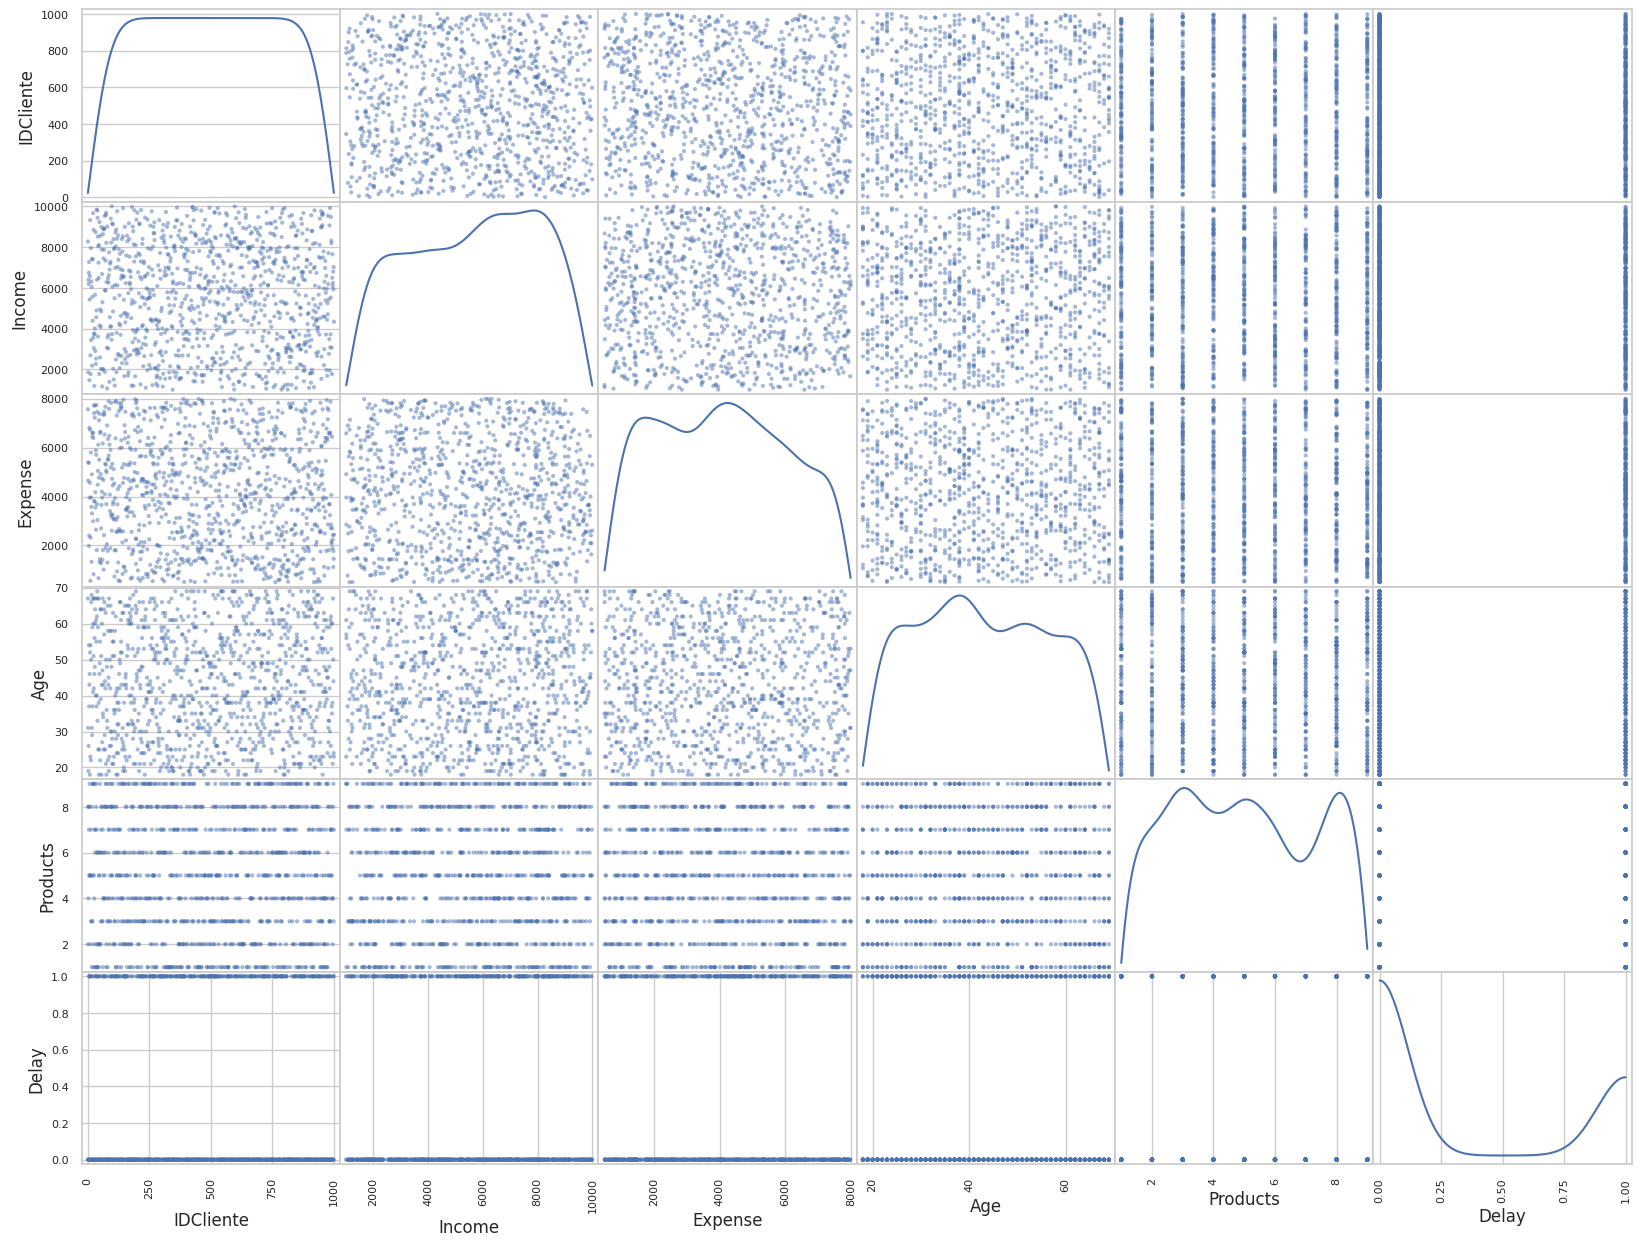

In [85]:
pd.plotting.scatter_matrix(data.loc[:,columns_names], diagonal="kde",figsize=(20,15))
plt.show()

# Seleccionar las variables para agrupar

In [86]:
# Seleccionar las características relevantes
features = data[["Income", "Expense", "Age", "Products", "Delay"]]

In [87]:
features

,Income,Expense,Age,Products,Delay
0,8270,7568,67,2,0
1,1860,4650,31,8,0
2,6390,5395,19,4,0
3,6191,5373,26,8,0
4,6734,1981,54,7,1
...,...,...,...,...,...
995,6232,2425,67,4,0
996,6797,1119,50,8,1
997,5926,1774,44,9,0
998,7016,1456,24,3,0


## Normalizar los datos

In [88]:
# Normalizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


# Crear dendograma con las variables seleccionadas

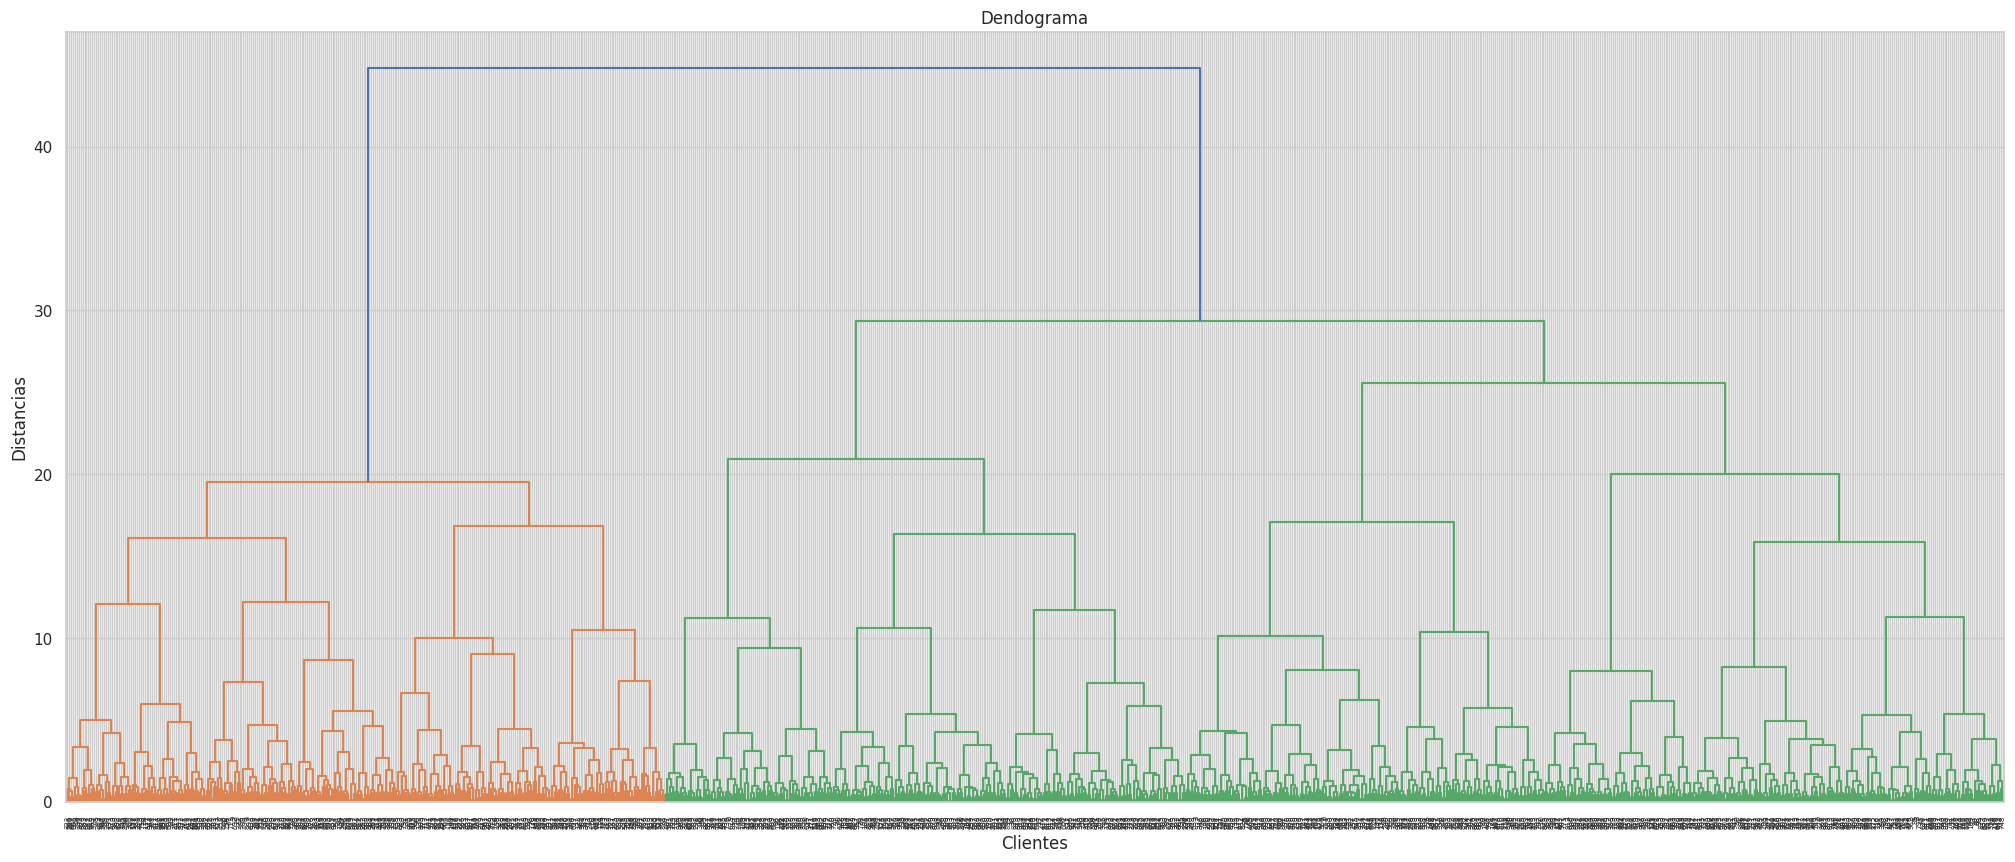

In [89]:
import scipy.cluster.hierarchy as sch
fig = plt.figure(figsize=(25, 10))
dendrogram = sch.dendrogram(sch.linkage(features_scaled, method = 'ward'))
plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias')
plt.show()

# Seleccionar el número de clusters y generar los **grupos** para cada cliente

In [90]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
data["Cluster"] = hc.fit_predict(features_scaled)

Mostrar

# Analizar Clusters

In [91]:
print(data["Cluster"].value_counts())

Cluster
1    309
0    269
2    237
3    185
Name: count, dtype: int64


## Visualizar los clusteres

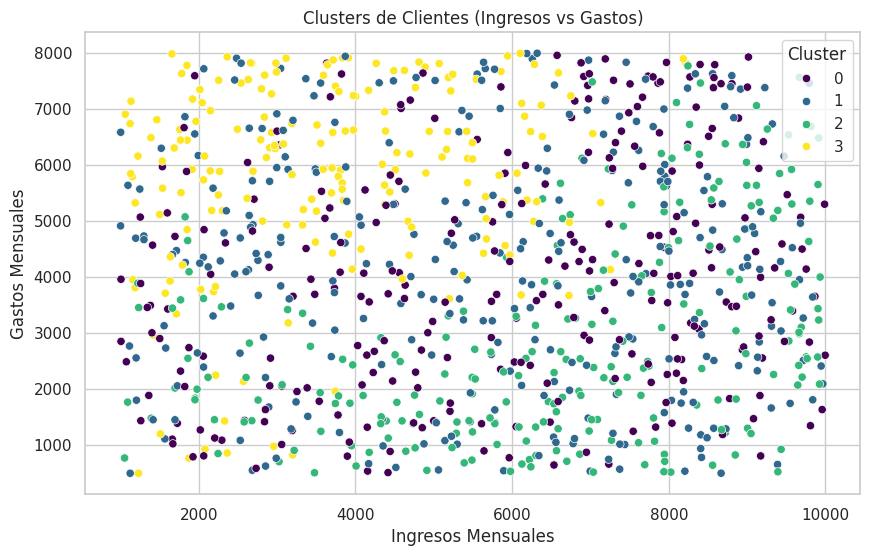

In [94]:
# Visualización de los clusters (usando Ingresos vs Gastos)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Income", y="Expense", hue="Cluster", palette="viridis")
plt.title("Clusters de Clientes (Ingresos vs Gastos)")
plt.xlabel("Ingresos Mensuales")
plt.ylabel("Gastos Mensuales")
plt.show()

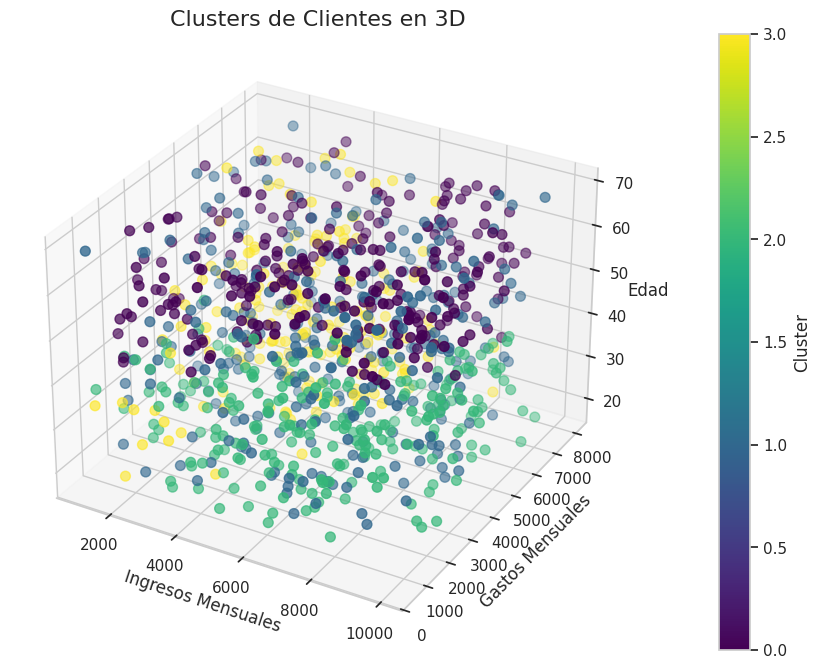

In [93]:
from mpl_toolkits.mplot3d import Axes3D

# Crear figura 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Graficar los puntos en 3D
scatter = ax.scatter(
    data["Income"],
    data["Expense"],
    data["Age"],
    c=data["Cluster"],  # Colorear por cluster
    cmap="viridis",  # Mapa de colores
    s=50,  # Tamaño de los puntos
)

# Etiquetas de los ejes
ax.set_xlabel("Ingresos Mensuales", fontsize=12)
ax.set_ylabel("Gastos Mensuales", fontsize=12)
ax.set_zlabel("Edad", fontsize=12)
ax.set_title("Clusters de Clientes en 3D", fontsize=16)

# Barra de colores para identificar los clusters
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label("Cluster", fontsize=12)

plt.show()

## 1. Identificar grupos de clientes con altos ingresos y bajos gastos

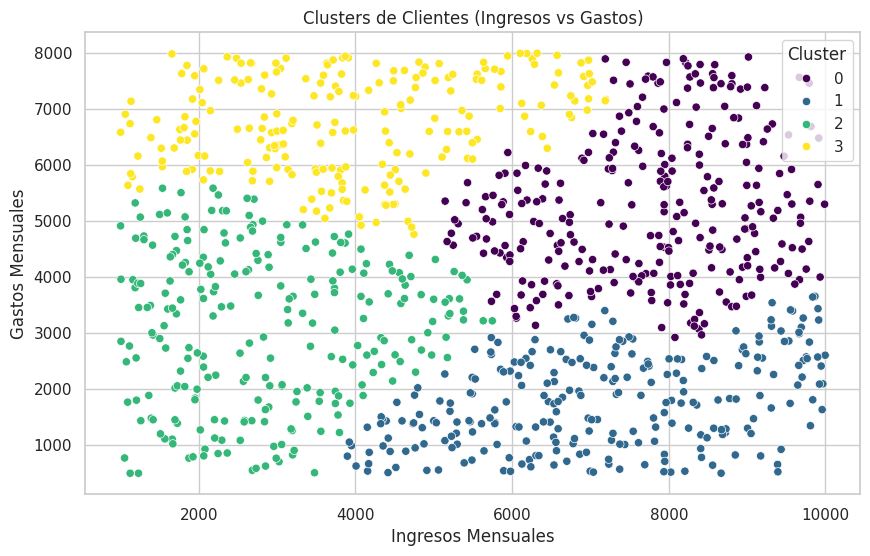

In [100]:
# Seleccionar las características relevantes
features = data[["Income", "Expense"]]
# Normalizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
#creamos los clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
data["Cluster"] = hc.fit_predict(features_scaled)
# Visualización de los clusters (usando Ingresos vs Gastos)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Income", y="Expense", hue="Cluster", palette="viridis")
plt.title("Clusters de Clientes (Ingresos vs Gastos)")
plt.xlabel("Ingresos Mensuales")
plt.ylabel("Gastos Mensuales")
plt.show()

## 2. Clientes jóvenes con alta morosidad

In [101]:
data.columns

Index(['IDCliente', 'Income', 'Expense', 'Age', 'Products', 'Delay',
       'Cluster'],
      dtype='object')

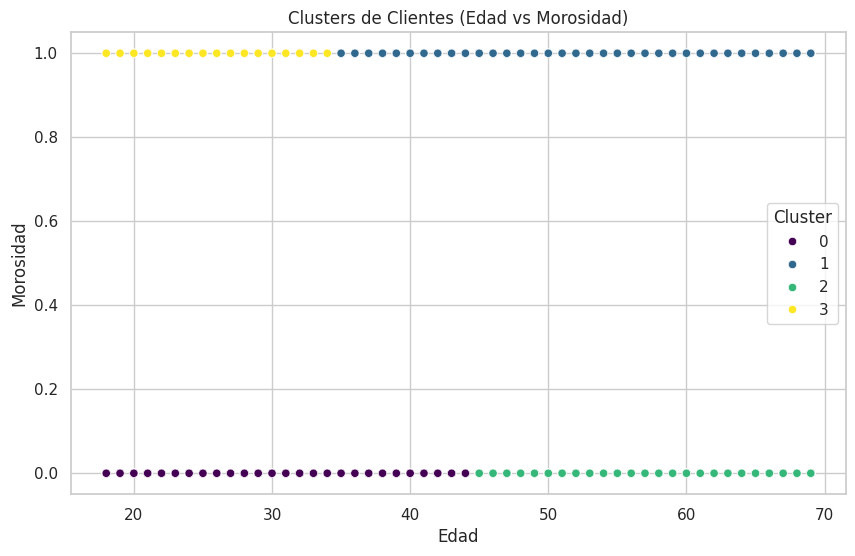

In [102]:
# Seleccionar las características relevantes
features = data[["Age", "Delay"]]
# Normalizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
#creamos los clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
data["Cluster"] = hc.fit_predict(features_scaled)
# Visualización de los clusters (usando Ingresos vs Gastos)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Age", y="Delay", hue="Cluster", palette="viridis")
plt.title("Clusters de Clientes (Edad vs Morosidad)")
plt.xlabel("Edad")
plt.ylabel("Morosidad")
plt.show()

## 3. Clientes mayores con altos ingresos y pocos gastos


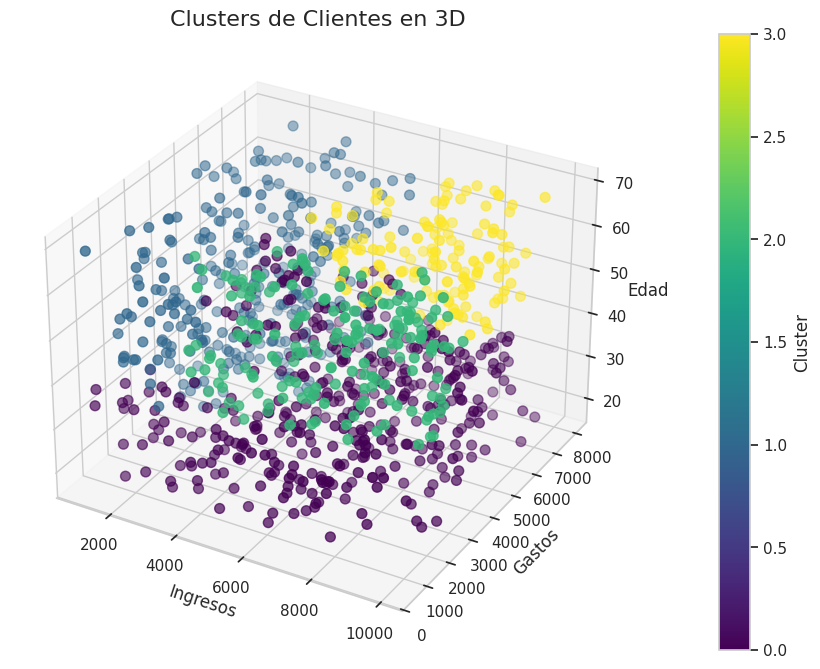

In [105]:
# Seleccionar las características relevantes
features = data[["Income","Expense", "Age"]]
# Normalizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
#creamos los clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
data["Cluster"] = hc.fit_predict(features_scaled)
# Visualización de los clusters (usando Ingresos vs Gastos)
# Crear figura 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Graficar los puntos en 3D
scatter = ax.scatter(
    data["Income"],
    data["Expense"],
    data["Age"],
    c=data["Cluster"],  # Colorear por cluster
    cmap="viridis",  # Mapa de colores
    s=50,  # Tamaño de los puntos
)

# Etiquetas de los ejes
ax.set_xlabel("Ingresos", fontsize=12)
ax.set_ylabel("Gastos", fontsize=12)
ax.set_zlabel("Edad", fontsize=12)
ax.set_title("Clusters de Clientes en 3D", fontsize=16)

# Barra de colores para identificar los clusters
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label("Cluster", fontsize=12)

plt.show()

Emitir conclusiones:

En caso de buscar los mejores clientes qué grupo seleccionaría y porqué?